## Defining the question

Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## Metric of success

A model with an r_squared square (Variance score) greater than 0.90 implying over 90% of the data can be fit into the model is developed.

The high score is set due to the narrow margins in the housing market worldwide

## Understanding the context

Hass Consulting Company is a real estate leader with over 25 years of experience. The housing market is very volatile and is affected by various factors such as economic growth, inflation, and other things such as businesses in a certain locality closing driving down the demand and subsequently the price of the house. 

There are a couple of structural attributes that affect the price of the house. These include attributes such as the size of the living room, basement and garage. The number of bedrooms and bathrooms in a house. 

Availability of amenities such as swimming pool, gym or jacuzzi make for a very expenive house. The building quality and architectural design style also affect te cost of the builidng. The cost of buildings is also affected by the location of the house. Houses in bad neighbourhoods tend tp fetch lower prices compared to houses in good meighbourhoods.

Renovation status of a house to some affects the price of a house to some extent.These factors can lay a good foundation in development of models that can predict house prices with a decent accuracy

## Experimental design

To achieve the set objectives the documentation belpw details the steps that shall be followed

1. Importing necesssary libraries
2. Loading the two datasets and previewing them
3. Tidyinng the datasets for outliers, duplicates, null values,creating new columns, and renaming columns appropiately
4. Performing univariate and bivariate analysis
5. checking for multicolinearity
6. Encoding categorical variable 
7.  performing normality test
8. Creating baseline linear regression model after comparing linear regression model scores with standardized and normalized data
9. Performing crossvalidation and heteroskedacity tests and residual plots
10. Challenging the solutions with (quantile, lasso, ridge and elastic regression models)
11. Summarizinng all employed models
12. Conclusion
13. Further questions

## Data relevance

Below is the dataset glossary:

1. Id 
2. price  - Price of the house
3. bedrooms - Number of Bedrooms
4. bathrooms - Number of Bathrooms
5. sqft_living - Square feet area of living area
6. sqft_lot  - Square feet area of parking Layout
7. floors - Number of Floors
8. waterfront - Whether waterfront is there or not
9. view - Number of Views
10. grade - Grades
11. sqft_above
12. sqft_basement - Square feet area off basement
13. yr_built - Year the house is built
14. yr_renovated - Year the house is renovated
15. zipcode - zipcode of the house
16. lat : Latitude of the house
18. lon : Longitude of the house
19. sqft_living15
20. sqft_lot15

## Importing libraries

In [95]:
# Importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing matplotlib
import matplotlib.pyplot as plt

# Importing seaborn
import seaborn as sns

# Importing datetime
import datetime

# Importing scipy.stats
import scipy.stats as stats

# Importing scipy
import scipy as sp

# Importing normaltest from scipy.stats
from scipy.stats import normaltest

# Importing polynomialfeatures from sklearn preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Importing train_test_split from sklearn linear model
from sklearn.model_selection import train_test_split

# Importing LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

# Importing LogisticRegressionmethod from sklearn linear_model library
from sklearn.linear_model import LogisticRegression

# Importing metrics from sklearn model selection
from sklearn import metrics

# Importing labelencoder as sklearn preprocessing
from sklearn.preprocessing import LabelEncoder

# Importing KFold from sklearn model selection
from sklearn.model_selection import KFold

# Importing Preprocessing from sklearn
from sklearn import preprocessing

# Importing leaveoneout from sklearn model selection
from sklearn.model_selection import LeaveOneOut

# Importing confusion_matrix from sklearn metrics
from sklearn.metrics import confusion_matrix

# importing accuracy_score from sklearn metrics
from sklearn.metrics import accuracy_score

# importing linear_model, datasets from sklearn metrics
from sklearn import linear_model, datasets

# Importing SelectKbest from sklearn feature selection
from sklearn.feature_selection import SelectKBest

# Importing chi2 from sklearn feature selection
from sklearn.feature_selection import chi2

# importing GridSearchCV from sklearn model selection
from sklearn.model_selection import GridSearchCV

# importing cross_val_predict form sklearn.model_selection
from sklearn.model_selection import cross_val_predict

# importing mean_squared_error, r2_score form sklearn Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Importing KFold from sklearn model selection
from sklearn.model_selection import KFold

# Home team score as the dependent feature
from sklearn.feature_selection import f_classif

# Importing ridge from sklearn linear model
from sklearn.linear_model import Ridge

# Importing elasticnet from sklearn linear model
from sklearn.linear_model import ElasticNet

# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

## loading dataset

In [96]:
# Loading dataset
housing_prices = pd.read_csv('http://bit.ly/IndependentProjectWeek7Dataset')

## Previewing dataset

In [97]:
# Rows and columns in data frame
columns, rows = housing_prices.shape
print(f'The dataset has {columns} columns and {rows} rows')


The dataset has 21613 columns and 20 rows


In [98]:
# Checking column info
housing_prices.info()

print('--------------------------------------------------------')
print('All columns have appropiate datatypes no encoding shall be done')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [99]:
# Preview column names
print(housing_prices.columns)
print('----------------------------------------------------------')
print('Some of the columns need to be renamed appropiately')

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')
----------------------------------------------------------
Some of the columns need to be renamed appropiately


In [100]:
# Preview first five records
housing_prices.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [101]:
# Preview last five records
housing_prices.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [102]:
housing_prices.columns


Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [103]:
# Year built unique values
print(housing_prices['yr_renovated'].unique())
print('''
Year renovated attribute has an anormally "zero"
This can be explained as houses that were sold without being renovated
''')

[   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]

Year renovated attribute has an anormally "zero"
This can be explained as houses that were sold without being renovated



In [104]:
# preview condition unique values
print(housing_prices['condition'].unique())
print('Condition attribute has five elements no anormally')

[3 5 4 1 2]
Condition attribute has five elements no anormally


In [105]:
# Year built unique values
print(housing_prices['yr_built'].unique())
print('Year built attribute has no anormally')

[1955 1951 1933 1965 1987 2001 1995 1963 1960 2003 1942 1927 1977 1900
 1979 1994 1916 1921 1969 1947 1968 1985 1941 1915 1909 1948 2005 1929
 1981 1930 1904 1996 2000 1984 2014 1922 1959 1966 1953 1950 2008 1991
 1954 1973 1925 1989 1972 1986 1956 2002 1992 1964 1952 1961 2006 1988
 1962 1939 1946 1967 1975 1980 1910 1983 1978 1905 1971 2010 1945 1924
 1990 1914 1926 2004 1923 2007 1976 1949 1999 1901 1993 1920 1997 1943
 1957 1940 1918 1928 1974 1911 1936 1937 1982 1908 1931 1998 1913 2013
 1907 1958 2012 1912 2011 1917 1932 1944 1902 2009 1903 1970 2015 1934
 1938 1919 1906 1935]
Year built attribute has no anormally


## Preprocessing

### Null values

In [106]:
housing_prices.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

The dataframe has no null values

### Duplicates

In [107]:
# print number of duplicate records in the datframe
print(f'''
The dataframe has {housing_prices.duplicated().sum()} duplicate records.
This is {((housing_prices.duplicated().sum() / len(housing_prices)) * 100)} 
percent of all records in the dataframe
''')



The dataframe has 3 duplicate records.
This is 0.013880534863276731 
percent of all records in the dataframe



- Duplicated values in the dataframe account for 0.014 percent of all

 records in the dataframe which is insignificant hence shall be dropped

In [108]:
# Dropping duplicate null values
# Dropping duplicate values
housing_prices.drop_duplicates(keep=False,inplace=True)

# Checking for any remaining duplicate values
print(f' Remaining null values: {housing_prices.duplicated().any().sum()}')  
print('There are no remaining duplicate values')

 Remaining null values: 0
There are no remaining duplicate values


### Outliers

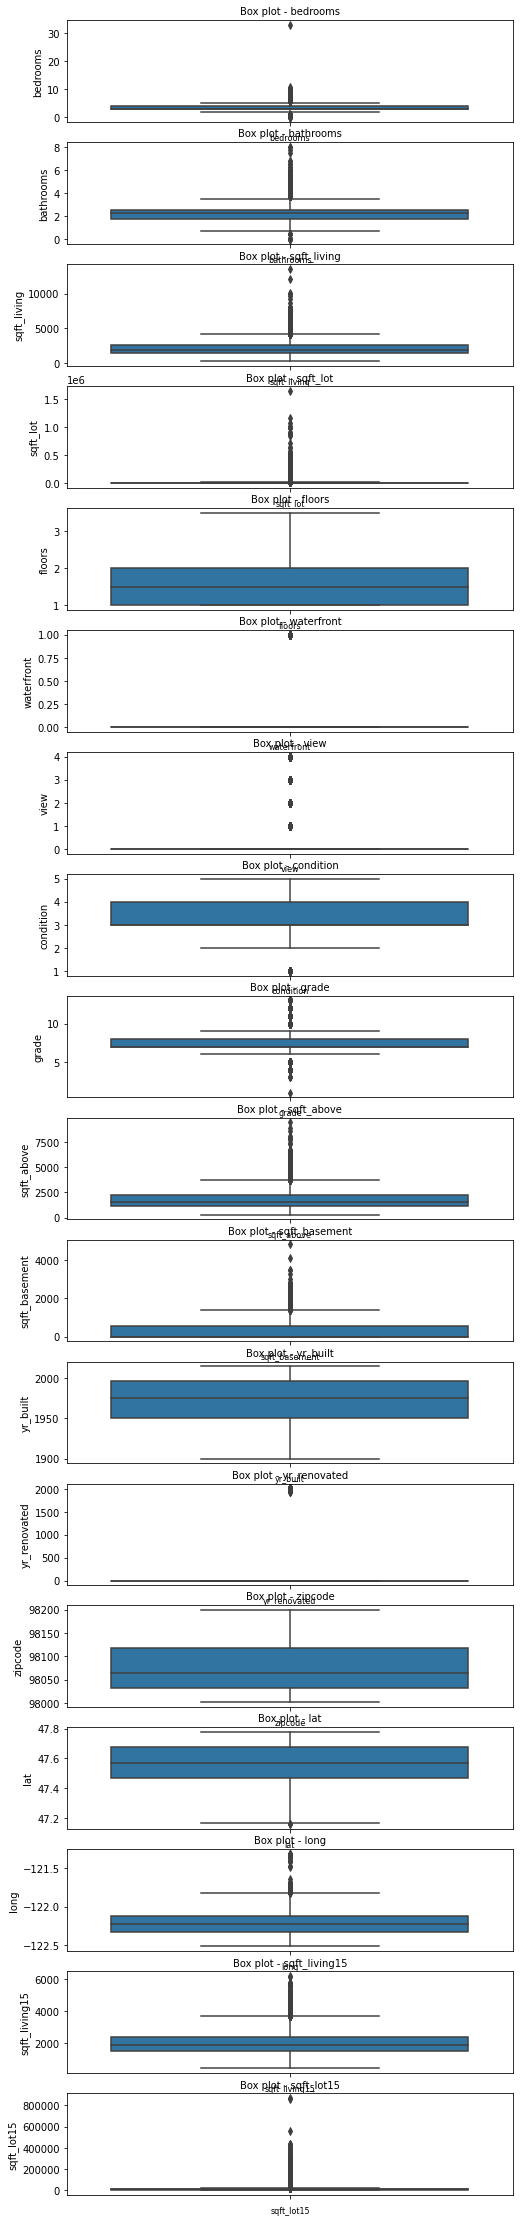

In [109]:
# Plotting to visualize outliers
# 1. Outliers
# Check for outliers
column_names = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):
    sns.boxplot(y=housing_prices[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()


-All columnns excluding year the building was built, zip code, and condition and latitude had outliers
- The attributes with outliers ('bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade', long, 'sqft_above', 'sqft_basement', 'yr_renovated','sqft_living15', 'sqft_lot15') are attributed to the difference in sizes, location, design and rennovations of the houses

### Renaming columns appropiately

In [110]:
# Renaming
housing_prices.columns = ['id', 'price', 'bedrooms', 'bathrooms', 'square feet living room', 'square feet lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'square feet above',
       'square feet basement', 'year built', 'year renovated', 'zipcode', 'latitude', 'longitude',
       'square feet living15', 'square feet lot15']
print(f'''
Columns names of dataframe: 
{housing_prices.columns}
      ''')
print('----------------------------------------')
print('All columns have been renamed appropiately')


Columns names of dataframe: 
Index(['id', 'price', 'bedrooms', 'bathrooms', 'square feet living room',
       'square feet lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'square feet above', 'square feet basement', 'year built',
       'year renovated', 'zipcode', 'latitude', 'longitude',
       'square feet living15', 'square feet lot15'],
      dtype='object')
      
----------------------------------------
All columns have been renamed appropiately


### Creating new columns

In [111]:
# Creating column indicating whether a house was renovated before it was sold or not
# create a list of our conditions
conditions = [
    (housing_prices['year renovated'] != 0),
    (housing_prices['year renovated'] == 0)
     ]

# create a list of the values we want to assign for each condition
values = ['Yes', 'No']

# create a new column and use np.select to assign values to it using our lists as arguments
housing_prices['renovated'] = np.select(conditions, values)

# display updated DataFrame
housing_prices.head()

,id,price,bedrooms,bathrooms,square feet living room,square feet lot,floors,waterfront,view,condition,...,square feet above,square feet basement,year built,year renovated,zipcode,latitude,longitude,square feet living15,square feet lot15,renovated
0,7129300520,221900.00,3,1.00,1180,5650,1.00,0,0,3,...,1180,0,1955,0,98178,47.51,-122.26,1340,5650,No
1,6414100192,538000.00,3,2.25,2570,7242,2.00,0,0,3,...,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,Yes
2,5631500400,180000.00,2,1.00,770,10000,1.00,0,0,3,...,770,0,1933,0,98028,47.74,-122.23,2720,8062,No
3,2487200875,604000.00,4,3.00,1960,5000,1.00,0,0,5,...,1050,910,1965,0,98136,47.52,-122.39,1360,5000,No
4,1954400510,510000.00,3,2.00,1680,8080,1.00,0,0,3,...,1680,0,1987,0,98074,47.62,-122.05,1800,7503,No


## Exploratory data analysis

### Univariate analysis

In [112]:
# python suppress exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Describe data
housing_prices.drop(columns=['id', 'zipcode']).describe()

,price,bedrooms,bathrooms,square feet living room,square feet lot,floors,waterfront,view,condition,grade,square feet above,square feet basement,year built,year renovated,latitude,longitude,square feet living15,square feet lot15
count,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000,21607.000
mean,540175.730,3.371,2.115,2079.863,15109.612,1.494,0.008,0.234,3.409,7.657,1788.305,291.558,1971.002,84.242,47.560,-122.214,1986.485,12769.608
std,367412.944,0.930,0.770,918.560,41425.942,0.540,0.087,0.766,0.651,1.176,828.186,442.618,29.372,401.319,0.139,0.141,685.460,27307.766
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,321500.000,3.000,1.750,1423.500,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10692.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.000
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


Mean, standard deviation and median of the various attribtues are:
												
1. price = Mean: 540175.730, Standard Deviation: 367412.944, Median: 450000.000, 
2. bedrooms= Mean: 3.371, Standard Deviation: 	0.930, Median: 3.000, 
3. bathrooms= Mean: 2.115, Standard Deviation: 0.770, Median: 2.250, 
4. square feet living room= Mean: 2079.863, Standard Deviation: 918.560, Median: 1910.000, 
5. square feet lot= Mean: 15109.612, Standard Deviation: 41425.942, Median: 7620.000, 
6. floors= Mean: 1.494, Standard Deviation: 0.540, Median: 1.500, 
7. waterfront= Mean: 0.008, Standard Deviation: 0.087, Median: 0.000, 
8. view= Mean: 0.23, Standard Deviation: 0.766, Median: 0.000, 
9. condition= Mean: 4	3.409, Standard Deviation: 0.651, Median: 3.000, 
10. grade= Mean: 7.657, Standard Deviation: 1.176, Median: 7.000, 
11. square feet above= Mean: 1788.305, Standard Deviation: 828.186, Median: 1560.000, 
12. square feet basement= Mean: 291.558, Standard Deviation: 442.618, Median: 0.000, 
13. year built= Mean: 1971.002, Standard Deviation: 29.372, Median: 1975.000, 
14. year renovated= Mean: 84.242, Standard Deviation: 401.319, Median: 0.000, 
15. latitude= Mean: 47.560, Standard Deviation: 0.139, Median: 47.572, 
16. longitude= Mean: -122.214, Standard Deviation: 0.141, Median: -122.231, 
17. square feet living15= Mean: 1986.485, Standard Deviation: 685.460, Median: 1840.000, 
18. square feet lot15'= Mean: 12769.608, Standard Deviation: 27307.766, Median: 7620.000, 


In [113]:
# skewness
housing_prices.drop(columns=['id', 'zipcode']).skew(axis=0, skipna=True, level=None, numeric_only=None) 


price                      4.021
bedrooms                   1.974
bathrooms                  0.511
square feet living room    1.472
square feet lot           13.058
floors                     0.617
waterfront                11.383
view                       3.398
condition                  1.033
grade                      0.771
square feet above          1.447
square feet basement       1.578
year built                -0.470
year renovated             4.554
latitude                  -0.485
longitude                  0.886
square feet living15       1.108
square feet lot15          9.506
dtype: float64

All attributes aside from latitude and year built are have positive skew (skewwed to the right)

latitude and year built have small negative skew(Slightly skewwed to the left). For year built, this indicates most of the houses were built after 1970

square feet loft and waterfront had the highest skew. This is indicative of the fact that only a few highend houses can have succes an amenity





In [114]:
# Kurtosis
housing_prices.drop(columns=['id', 'zipcode']).kurtosis(axis=0, skipna=True, level=None, numeric_only=None) 


price                      34.512
bedrooms                   49.057
bathrooms                   1.279
square feet living room     5.241
square feet lot           285.003
floors                     -0.484
waterfront                127.596
view                       10.911
condition                   0.526
grade                       1.191
square feet above           3.402
square feet basement        2.714
year built                 -0.657
year renovated             18.746
latitude                   -0.677
longitude                   1.050
square feet living15        1.597
square feet lot15         150.723
dtype: float64

3 attributes had a negative kurtosis: floors, latitude and year built.
This implied it had less tails than a normal distribution.

All the remaining attributes had a positive kurtosis square feet lot15, waterfront, and squarefeet lot had the highest kurtosis

In [115]:
# Value counts of number of bathrooms the different houses sold had
print(housing_prices['bathrooms'].value_counts())

print(''' 
The number of baths per house ranged from 0 baths to as many as 7 and 3/4 baths
Most common number of baths per house was two and a half baths
Most common number of baths were 2.5, 1.0, 1.75. 2.25, and 2.00 baths
''')

2.500    5376
1.000    3852
1.750    3046
2.250    2047
2.000    1930
1.500    1446
2.750    1185
3.000     753
3.500     731
3.250     589
3.750     155
4.000     136
4.500     100
4.250      79
0.750      72
4.750      23
5.000      21
5.250      13
0.000      10
5.500      10
1.250       9
6.000       6
0.500       4
5.750       4
6.750       2
8.000       2
6.250       2
6.500       2
7.500       1
7.750       1
Name: bathrooms, dtype: int64
 
The number of baths per house ranged from 0 baths to as many as 7 and 3/4 baths
Most common number of baths per house was two and a half baths
Most common number of baths were 2.5, 1.0, 1.75. 2.25, and 2.00 baths



In [116]:
# Value counts of number of bedrooms the different houses sold had
print(housing_prices['bedrooms'].value_counts())

3     9820
4     6880
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


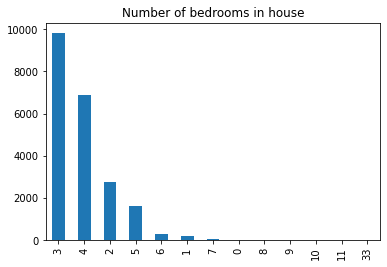


Most of the houses sold had either 2, 3, 4 or five bedrooms the most being 3 bedrooms
Bedrooms im sold houses ranged from 0-11 with one house having as many as 33 bedrooms



In [117]:
# Bar chart representing the number of bedrooms in the houses sold
(housing_prices['bedrooms'].value_counts()).plot.bar(title='Number of bedrooms in house')
plt.show()

print('''
Most of the houses sold had either 2, 3, 4 or five bedrooms the most being 3 bedrooms
Bedrooms im sold houses ranged from 0-11 with one house having as many as 33 bedrooms
''')

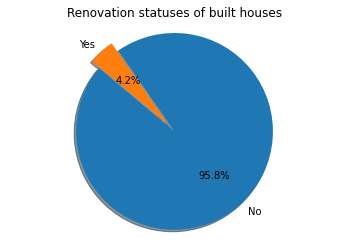


Only 4.2 percent of houses sold were renovated
A vast majority of the houses 95.8% were sold without being renovated



In [118]:
# Renovation status of most houses
result = housing_prices['renovated'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(result, explode = explode, labels = result.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Renovation statuses of built houses')

# Show plot
plt.show()

print('''
Only 4.2 percent of houses sold were renovated
A vast majority of the houses 95.8% were sold without being renovated
''')

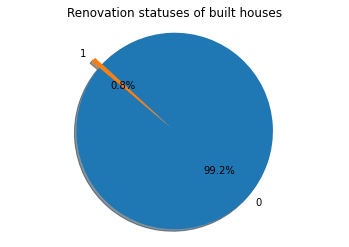


Only 0.8 percent of houses sold had water fronts
A vast majority of the houses 99.2% were sold without had no waterfronts



In [119]:
# Renovation status of most houses
result = housing_prices['waterfront'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(result, explode = explode, labels = result.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Renovation statuses of built houses')

# Show plot
plt.show()

print('''
Only 0.8 percent of houses sold had water fronts
A vast majority of the houses 99.2% were sold without had no waterfronts
''')

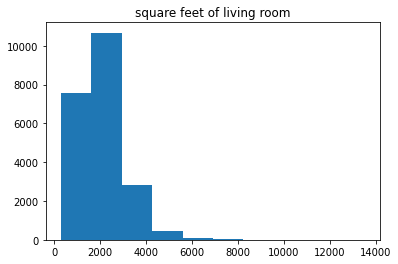


Most of the houses in the dataset had living rooms 
between 400 - 4400 square feet in size



In [120]:
# Histogram of square feet living room
plt.hist(housing_prices['square feet living room'], bins =10)
plt.title('square feet of living room')
plt.show()

print('''
Most of the houses in the dataset had living rooms 
between 400 - 4400 square feet in size
''')

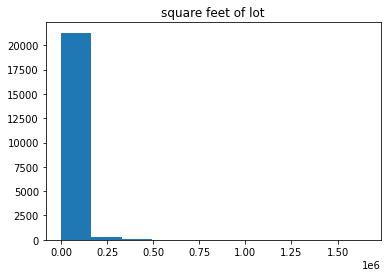


Most of the houses in the dataset had lots between 
0-0.25 square feet in size



In [121]:
# Histogram of square feet lot
plt.hist(housing_prices['square feet lot'], bins =10)
plt.title('square feet of lot')
plt.show()

print('''
Most of the houses in the dataset had lots between 
0-0.25 square feet in size
''')

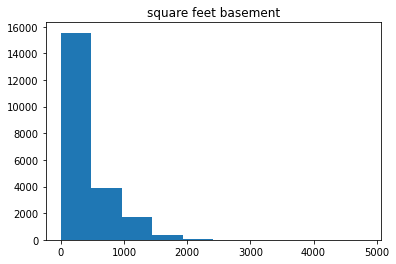


Most of the houses in the dataset had basements less 
than 1000 square feet in size



In [122]:
# Histogram of square feet basement
plt.hist(housing_prices['square feet basement'], bins =10)
plt.title('square feet basement')
plt.show()

print('''
Most of the houses in the dataset had basements less 
than 1000 square feet in size
''')

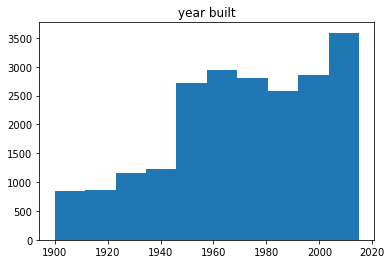


Most of the houses in the dataset were built after 1950
After which the rate of building houses remained fairly constant



In [123]:
# Histogram of year built
plt.hist(housing_prices['year built'], bins =10)
plt.title('year built')
plt.show()

print('''
Most of the houses in the dataset were built after 1950
After which the rate of building houses remained fairly constant
''')

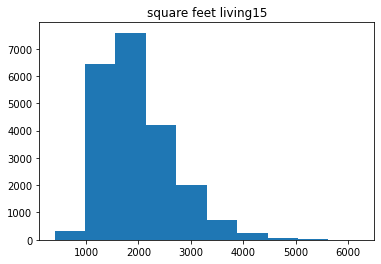


Most of the houses in the dataset had living15 rooms between
1000-3000 square feet in size



In [124]:
# Histogram of square feet living15
plt.hist(housing_prices['square feet living15'], bins =10)
plt.title('square feet living15')
plt.show()

print('''
Most of the houses in the dataset had living15 rooms between
1000-3000 square feet in size
''')

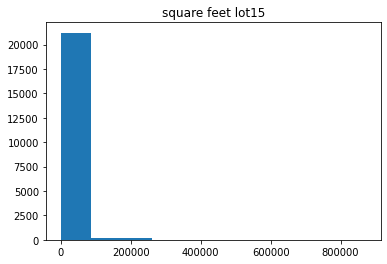


Most of the houses in the dataset had lot15 rooms
less than 200000 square feet in size



In [125]:
# Histogram of square feet lot15
plt.hist(housing_prices['square feet lot15'], bins =10)
plt.title('square feet lot15')
plt.show()

print('''
Most of the houses in the dataset had lot15 rooms
less than 200000 square feet in size
''')

### Bivariate analysis


The scatter plot shows that the largest variation in prices with highest and 
lowest prices occured between the latitudes 47.5-47.8 degrees



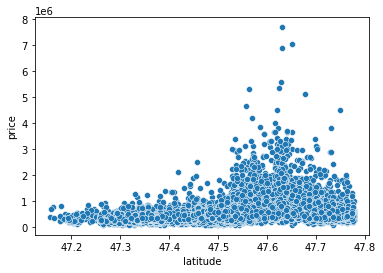

In [126]:
# Scatter plot prices vs latitude
sns.scatterplot(data=housing_prices, y="price", x="latitude" )

print('''
The scatter plot shows that the largest variation in prices with highest and 
lowest prices occured between the latitudes 47.5-47.8 degrees
''')


The scatter plot shows that the largest variation in prices with highest and 
lowest prices occured between the longitudes -122.4 to -122.0 degrees



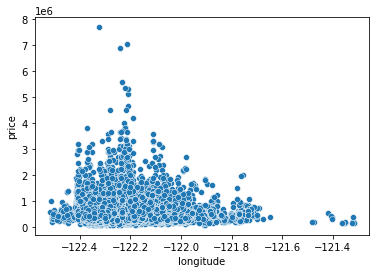

In [127]:
# Scatter plot prices vs longitude
sns.scatterplot(data=housing_prices, y="price", x="longitude" )

print('''
The scatter plot shows that the largest variation in prices with highest and 
lowest prices occured between the longitudes -122.4 to -122.0 degrees
''')


Houses with a quality of 1 and 2 fetched the lowest price variation
All houses rated 1 and 2 fetcged low prices. 
Houses with a quality of 3 and 4 had the highest price variation 
Houses with a condition of 5 had a lower variation than those with 
condition 3 and 4. However it did not fetch extremely high prices like 
those houses



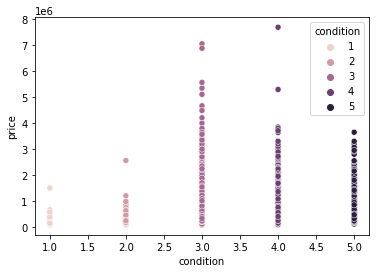

In [128]:
# Scatterplot of condition versus price
sns.scatterplot(data=housing_prices, x="condition", y="price", hue="condition")

print('''
Houses with a quality of 1 and 2 fetched the lowest price variation
All houses rated 1 and 2 fetcged low prices. 
Houses with a quality of 3 and 4 had the highest price variation 
Houses with a condition of 5 had a lower variation than those with 
condition 3 and 4. However it did not fetch extremely high prices like 
those houses
''')


From the plot there isn't a significant difference in prices and price variation
between houses with and those without a water front



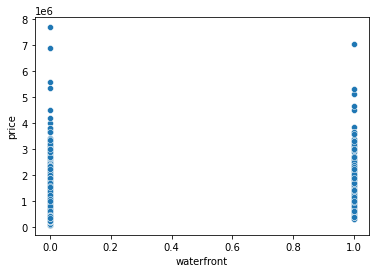

In [129]:
# Scatterplot of waterfront versus price
sns.scatterplot(data=housing_prices, x="waterfront", y="price")

print('''
From the plot there isn't a significant difference in prices and price variation
between houses with and those without a water front
''')


From the scatter plot the average price along with price variation increased as
number of bedrooms increased
The prices peaked at 5-6 bedrooms. The average price along with price variation 
the dropped with a further increase in the number of bedrooms(7 bedrooms and more)



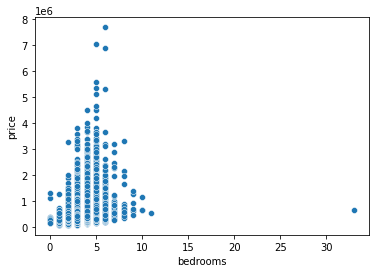

In [130]:
# Scatterplot of bedrooms versus price
sns.scatterplot(data=housing_prices, x="bedrooms", y="price")

print('''
From the scatter plot the average price along with price variation increased as
number of bedrooms increased
The prices peaked at 5-6 bedrooms. The average price along with price variation 
the dropped with a further increase in the number of bedrooms(7 bedrooms and more)
''')


From the regression plot houses the average price and price variation increases 
with an increase in the number of bathrooms in a house.
At 8 bathrooms, the highest and a really low house price was recorded



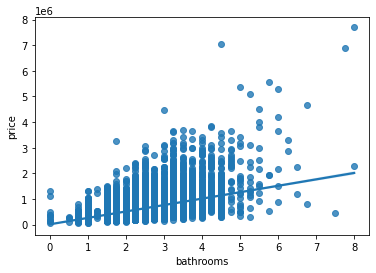

In [131]:
# Scatterplot of bathrooms versus price
sns.regplot(data=housing_prices, x="bathrooms", y="price")

print('''
From the regression plot houses the average price and price variation increases 
with an increase in the number of bathrooms in a house.
At 8 bathrooms, the highest and a really low house price was recorded
''')


From the regression plot houses the average price and price variation increases
with an increase in the size(square feet) of the living room



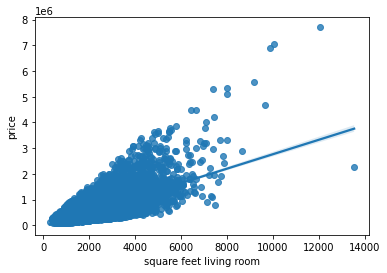

In [132]:
# Scatterplot of 'square feet living room' versus price
sns.regplot(data=housing_prices, x="square feet living room", y="price")

print('''
From the regression plot houses the average price and price variation increases
with an increase in the size(square feet) of the living room
''')


From the regression plot houses the average price inccreases while the 
price variation decreases with an increase in the size(square feet) of the lot



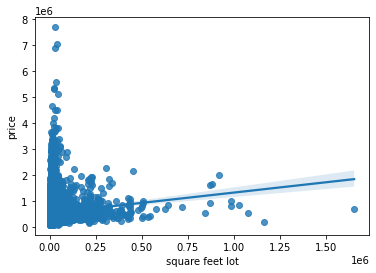

In [133]:
# Scatterplot of 'square feet lot' versus price
sns.regplot(data=housing_prices, x="square feet lot", y="price")

print('''
From the regression plot houses the average price inccreases while the 
price variation decreases with an increase in the size(square feet) of the lot
''')


From the scatter plot houses the highest prices and price variations are observed 
in houses with two floors



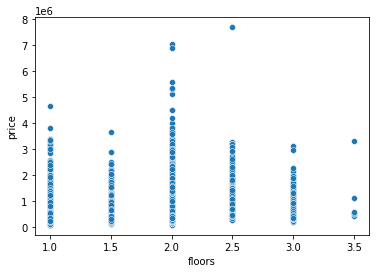

In [134]:
# Scatterplot of 'floors' versus price
sns.scatterplot(data=housing_prices, x="floors", y="price")

print('''
From the scatter plot houses the highest prices and price variations are observed 
in houses with two floors
''')


The largest price varitions are observed in those house that don't have good 
view(rated 0) and those with the best view(rated 4) 
Variations existed in the houses with view ratings 2 and 3 but a one value and
that was an outlier



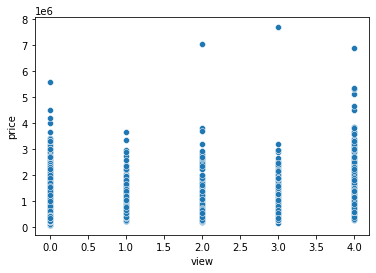

In [135]:
# Scatterplot of 'view' versus price
sns.scatterplot(data=housing_prices, x="view", y="price")

print('''
The largest price varitions are observed in those house that don't have good 
view(rated 0) and those with the best view(rated 4) 
Variations existed in the houses with view ratings 2 and 3 but a one value and
that was an outlier
''')


From the regression plot, there is an increase in average price and variation of 
prices with an increase in the grade of the house 



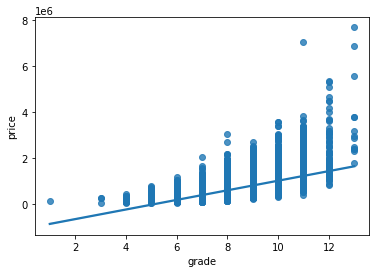

In [136]:
# Scatterplot of 'grade' versus price
sns.regplot(data=housing_prices, x="grade", y="price")

print('''
From the regression plot, there is an increase in average price and variation of 
prices with an increase in the grade of the house 
''')


From the regression plot, there is an increase in average price and variation of 
prices with an increase in the square feet above of the house 



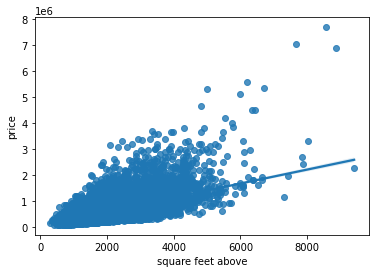

In [137]:
# Scatterplot of 'square feet above' versus price
sns.regplot(data=housing_prices, x="square feet above", y="price")

print('''
From the regression plot, there is an increase in average price and variation of 
prices with an increase in the square feet above of the house 
''')


From the regression plot, there is an increase in average price and variation of 
prices with an increase in the square feet house basement



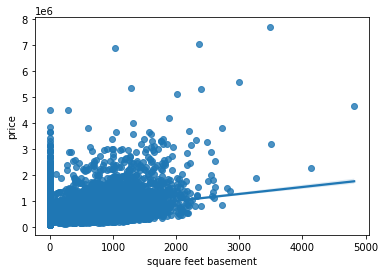

In [138]:
# Scatterplot of 'square feet basement' versus price
sns.regplot(data=housing_prices, x="square feet basement", y="price")

print('''
From the regression plot, there is an increase in average price and variation of 
prices with an increase in the square feet house basement
''')


From the line chart, houses built between 1940-1980s fetched the lowest prices
Houses built between 1920 - 1940 and after 1990s going foward fetched highest 
prices.
This can be attributed to the artistic style of the times being appealing, the
relative newness of the building, or the building quality of the times being 
very good hence fetching high prices. 



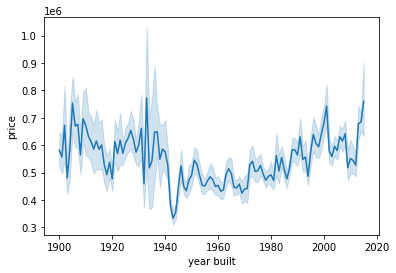

In [139]:
# Scatterplot of 'year built' versus price
sns.lineplot(data=housing_prices, x="year built", y="price")

print('''
From the line chart, houses built between 1940-1980s fetched the lowest prices
Houses built between 1920 - 1940 and after 1990s going foward fetched highest 
prices.
This can be attributed to the artistic style of the times being appealing, the
relative newness of the building, or the building quality of the times being 
very good hence fetching high prices. 
''')


From the regression plot, the houses renovated most recently fetched the highest 
prices.



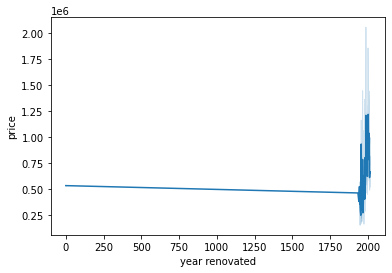

In [140]:
# Scatterplot of 'year renovated' versus price
sns.lineplot(data=housing_prices, x="year renovated", y="price")

print('''
From the regression plot, the houses renovated most recently fetched the highest 
prices.
''')


From the regression plot, the house price and variation in prices increases with 
an increase in the square feet living15



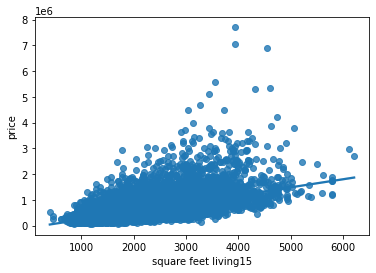

In [141]:
# Scatterplot of 'square feet living15' versus price
sns.regplot(data=housing_prices, x="square feet living15", y="price")

print('''
From the regression plot, the house price and variation in prices increases with 
an increase in the square feet living15
''')


From the regression plot, highest  price variations are observed in houses with 
less than 200000 square feet lot15. However there is an increase in average
price with an increase in lot price



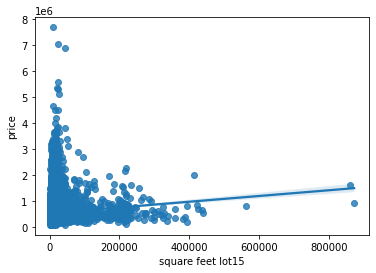

In [142]:
# Scatterplot of 'square feet lot15' versus price
sns.regplot(data=housing_prices, x="square feet lot15", y="price")

print('''
From the regression plot, highest  price variations are observed in houses with 
less than 200000 square feet lot15. However there is an increase in average
price with an increase in lot price
''')

## Multicolinearity

In [143]:
# Correlation plot among the various indepednent variables
correlations = housing_prices.drop(columns = ['id', 'price']).corr()
correlations

,bedrooms,bathrooms,square feet living room,square feet lot,floors,waterfront,view,condition,grade,square feet above,square feet basement,year built,year renovated,zipcode,latitude,longitude,square feet living15,square feet lot15
bedrooms,1.000,0.516,0.577,0.032,0.175,-0.007,0.079,0.028,0.357,0.478,0.303,0.154,0.019,-0.153,-0.009,0.129,0.392,0.029
bathrooms,0.516,1.000,0.755,0.088,0.501,0.064,0.188,-0.125,0.665,0.685,0.284,0.506,0.051,-0.204,0.025,0.223,0.569,0.087
square feet living room,0.577,0.755,1.000,0.173,0.354,0.104,0.285,-0.059,0.763,0.877,0.435,0.318,0.055,-0.199,0.053,0.240,0.756,0.183
square feet lot,0.032,0.088,0.173,1.000,-0.005,0.022,0.075,-0.009,0.114,0.184,0.015,0.053,0.008,-0.130,-0.086,0.230,0.145,0.719
floors,0.175,0.501,0.354,-0.005,1.000,0.024,0.029,-0.264,0.458,0.524,-0.246,0.489,0.006,-0.059,0.050,0.125,0.280,-0.011
waterfront,-0.007,0.064,0.104,0.022,0.024,1.000,0.402,0.017,0.083,0.072,0.081,-0.026,0.093,0.030,-0.014,-0.042,0.086,0.031
view,0.079,0.188,0.285,0.075,0.029,0.402,1.000,0.046,0.251,0.168,0.277,-0.053,0.102,0.085,0.006,-0.079,0.280,0.073
condition,0.028,-0.125,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.145,-0.158,0.174,-0.361,-0.061,0.003,-0.015,-0.107,-0.093,-0.003
grade,0.357,0.665,0.763,0.114,0.458,0.083,0.251,-0.145,1.000,0.756,0.168,0.447,0.014,-0.185,0.114,0.198,0.713,0.119
square feet above,0.478,0.685,0.877,0.184,0.524,0.072,0.168,-0.158,0.756,1.000,-0.052,0.424,0.023,-0.261,-0.001,0.344,0.732,0.194


- Bedrooms, bathrooms, square feet living15 and the size of the living room had a strong correlation (> 0.5) amongst each other

- square feet above had a strong correlation (>0.5) with bathrooms, square feet living15 and the size of the living room

- The year a building was built had a strong correlation with the number of bathrooms a building 

- The number of floors in a building had a strong coreelation with the square feet above and the number of bathrooms a building.


In [144]:
# python suppress exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,bedrooms,bathrooms,square feet living room,square feet lot,floors,waterfront,view,condition,grade,square feet above,square feet basement,year built,year renovated,zipcode,latitude,longitude,square feet living15,square feet lot15
bedrooms,1.652,-0.462,-0.655,0.049,0.050,0.063,0.115,-0.050,0.307,-0.265,-0.162,0.135,0.046,0.080,0.051,0.018,0.025,0.085
bathrooms,-0.462,3.352,0.649,-0.024,-0.676,0.010,-0.043,-0.138,-0.268,-1.863,-1.389,-0.936,-0.261,0.042,-0.041,0.053,0.092,0.071
square feet living room,-0.659,0.638,95982763108570.141,0.183,-0.501,-0.071,0.082,-0.167,0.181,-86539421877992.641,-46250377037454.523,-0.292,-0.124,-0.285,-0.044,-0.159,-1.526,-0.329
square feet lot,0.049,-0.024,0.184,2.103,0.045,0.027,-0.059,0.030,-0.054,-0.365,-0.131,0.099,0.021,-0.003,0.053,-0.133,0.164,-1.459
floors,0.050,-0.676,-0.512,0.045,2.012,-0.006,-0.040,0.090,-0.231,-0.045,0.861,-0.481,-0.079,-0.171,-0.127,0.164,0.273,0.073
waterfront,0.063,0.010,-0.073,0.027,-0.006,1.204,-0.493,-0.013,0.049,-0.047,0.031,-0.021,-0.066,0.023,0.010,0.027,0.054,-0.018
view,0.115,-0.043,0.087,-0.059,-0.040,-0.493,1.435,-0.021,-0.185,-0.039,-0.298,0.152,-0.038,-0.141,0.119,0.072,-0.325,-0.007
condition,-0.050,-0.138,-0.168,0.030,0.090,-0.013,-0.021,1.250,-0.055,0.207,-0.017,0.561,0.207,0.161,0.064,-0.007,0.076,-0.028
grade,0.307,-0.268,0.191,-0.054,-0.231,0.049,-0.185,-0.055,3.417,-1.784,-0.579,-0.639,-0.072,0.083,-0.331,0.394,-0.912,0.072
square feet above,-0.281,-1.848,-86539421877992.609,-0.364,-0.053,-0.048,-0.035,0.206,-1.773,78025171358178.719,41699996549726.875,0.783,0.111,0.181,0.221,-0.199,-0.160,0.121


## Encoding

The newly created column('renovated') with categorical data ('yes and no') shall be label encoded

In [145]:
#Encoding Catergorical data
encoder = LabelEncoder()

# Encoding renovated in dataset
housing_prices['renovated'] = encoder.fit_transform(housing_prices['renovated'])
housing_prices.head()

,id,price,bedrooms,bathrooms,square feet living room,square feet lot,floors,waterfront,view,condition,...,square feet above,square feet basement,year built,year renovated,zipcode,latitude,longitude,square feet living15,square feet lot15,renovated
0,7129300520,221900.000,3,1.000,1180,5650,1.000,0,0,3,...,1180,0,1955,0,98178,47.511,-122.257,1340,5650,0
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0,0,3,...,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,1
2,5631500400,180000.000,2,1.000,770,10000,1.000,0,0,3,...,770,0,1933,0,98028,47.738,-122.233,2720,8062,0
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0,0,5,...,1050,910,1965,0,98136,47.521,-122.393,1360,5000,0
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0,0,3,...,1680,0,1987,0,98074,47.617,-122.045,1800,7503,0


## Normality test

The normality test shall be performed using  D’Agostino’s K^2 test

H0= The sample comes from a normal distribution.

HA=The sample is not coming from normal distribution.

In [146]:
# Specifying columns
columns = ['bedrooms', 'bathrooms', 'square feet living room',
       'square feet lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'square feet above', 'square feet basement', 'year built',
       'year renovated', 'zipcode', 'latitude', 'longitude',
       'square feet living15', 'square feet lot15', 'renovated']

# Specifying alpha
alpha = 0.05
for i in columns:
  print([i])
  a,b = stats.normaltest(housing_prices[[i]])
  print(a, b)
  if b < alpha:
    print('The null hypothesis can be rejected')
  else:
    print('The null hypothesis cannot be rejected')

['bedrooms']
[13402.173083] [0.000000]
The null hypothesis can be rejected
['bathrooms']
[1422.492056] [0.000000]
The null hypothesis can be rejected
['square feet living room']
[6848.214448] [0.000000]
The null hypothesis can be rejected
['square feet lot']
[38917.363774] [0.000000]
The null hypothesis can be rejected
['floors']
[1546.968599] [0.000000]
The null hypothesis can be rejected
['waterfront']
[35491.147916] [0.000000]
The null hypothesis can be rejected
['view']
[14883.072101] [0.000000]
The null hypothesis can be rejected
['condition']
[2842.892916] [0.000000]
The null hypothesis can be rejected
['grade']
[2233.791653] [0.000000]
The null hypothesis can be rejected
['square feet above']
[6009.704184] [0.000000]
The null hypothesis can be rejected
['square feet basement']
[6180.429610] [0.000000]
The null hypothesis can be rejected
['year built']
[1647.721903] [0.000000]
The null hypothesis can be rejected
['year renovated']
[19194.589213] [0.000000]
The null hypothesis can

From the initial data exploration, It is evident that:
- The various indepedent variables many have outliers
- The attributes in the dataset suffers from multicolinearity
- All attributes in the dataframe don't follow a normal distribution 

## Multiple linear regression model

- Here the a linear approach for modelling the relationship between a house price and the other 19 indepedent variables will be adopted will be adopted

- Linear regression without any feature selection, removal of any highly correlated variables, dealing with outliers shall serve as the baseline model

- The only alteration will be standardization and normalization of the indpendent variables in order to make a comparison what is the best way to scale the data

### Modelling with standardized data

The first linear regression model will be constructed with the data being standardized. The obtained result will be compared with that obtained when data is normalized

In [147]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])

# Target variable
y = housing_prices['price']

In [148]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

In [149]:
# importing stats model api
import statsmodels.api as sm

# Linear Regression model
regression = linear_model.LinearRegression()
regression.fit(X, y)

print('Intercept: \n', regression.intercept_)
print('''
-----------------------------------------
------------------------------------------
------------------------------------------
''')
print('Coefficients: \n', regression.coef_)


Intercept: 
 540175.729994905

-----------------------------------------
------------------------------------------
------------------------------------------

Coefficients: 
 [-33446.238234 30826.913148 82082.112866 5494.854972 4061.042637
 50934.075724 40849.200684 17958.792597 111817.839234 76794.794183
 26652.559002 -76969.090279 1415207.110494 -31305.850643 83667.045253
 -30301.451950 15409.026122 -10523.273087 -1407081.072611]


- The intercept or alpha consta obtained was 540175.73 unit currency. This implies if all indpendent variables are equal to zero the price of the house will be the value of the intercept

- The coefficeints e.g for bedroom implies that for one unit increase in the number of bedrooms the price changes(decreases) by 33446.238 currency units.

- For bathrooms one unit increase in the number of bathrooms the house price inreases by 30826.913 currency units

- The renovation status of a house and the year renovated both of which are related since the renovation attribute is derived from the  year of rennovation had the highest impact on price. 

- For attribute renovated or not renovated if a house is renovated the house price changes by -1407081.07

In [150]:
# Model predictions
predictions = regression.predict(X)

# Mean square error and variance scores for model1
model1_mse = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
model1_varscore = regression.score(X, y)

# Printing the mean square error and variance scores
print("Mean squared error model1: {0:.2f}"
      .format(model1_mse))
print('Variance score model1: {0:.2f}'.format(model1_varscore))


Mean squared error model1: 40392039555.60
Variance score model1: 0.70


In [151]:
rmse_value =  np.sqrt(metrics.mean_squared_error(y_true=y,y_pred=regression.predict(X)))

print(" Root Mean squared error model1: {0:.2f}"
      .format(rmse_value))

 Root Mean squared error model1: 200977.71


In [152]:
# Printing feature variable coeficients of gridlasso net regression
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 30826.9131481854,
 'bedrooms': -33446.23823371731,
 'condition': 17958.792596740906,
 'floors': 4061.0426374216304,
 'grade': 111817.83923368808,
 'latitude': 83667.04525340127,
 'longitude': -30301.45194985239,
 'renovated': -1407081.0726111305,
 'square feet above': 76794.7941825852,
 'square feet basement': 26652.559001660054,
 'square feet living room': 82082.11286570474,
 'square feet living15': 15409.026122347492,
 'square feet lot': 5494.854972198796,
 'square feet lot15': -10523.273086994412,
 'view': 40849.20068418725,
 'waterfront': 50934.07572430486,
 'year built': -76969.0902790053,
 'year renovated': 1415207.1104936337,
 'zipcode': -31305.850642660513}

In [153]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

In [154]:
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 

print_model1 = model.summary()
pd.options.display.float_format = '{:.2f}'.format
print(print_model1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2809.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:32   Log-Likelihood:            -2.9450e+05
No. Observations:               21607   AIC:                         5.890e+05
Df Residuals:                   21588   BIC:                         5.892e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    5

**Results**
1. The model summary affirms that multicolinearity initially observed in the the multicolinearity test affects the linear regression model

2. The model had an r_squared square of (Variance score) 0.701. This implies 70.1% of the data fit into the model

3. The prob(F-Statistic) obtained(0.00) was statistically significant. This implies that the sample data provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables.

4. The p-value for each independent variable tests the null hypothesis that the variable has no correlation with the dependent variable. All the p values obtained for the different independent variables in the model aside from floors were statistically significant. The null hypothesis can be rejected and concluded that all the indpendent variables aside form floors have a correlation with the target variable price

### Modelling with Normalized data

A second linear regression model will be performed with normalized data and the a comparisom made between the two linear regression models

In [155]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])

# Target variable
y = housing_prices['price']

In [156]:
# Normalizing data
norm_data = preprocessing.normalize(X)

# Converting normalized array data to dataframe
X = pd.DataFrame(norm_data, index=X.index, columns=X.columns)


In [157]:
# importing stats model api
import statsmodels.api as sm

# Linear Regression model
regression = linear_model.LinearRegression()
regression.fit(X, y)

print(f'Intercept: \n, {regression.intercept_:.20f}')
print('''
-----------------------------------------
------------------------------------------
------------------------------------------
''')
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
print('Coefficients: \n', regression.coef_)


Intercept: 
, 986872.59168417705222964287

-----------------------------------------
------------------------------------------
------------------------------------------

Coefficients: 
 [-3857097180.183893 3714511346.750151 11990008.687509 -129468.210318
 -767785728.004392 64964845487.047737 5116877228.617845 2949906829.371175
 9680839139.273464 8316389.793743 3673618.564405 -257531639.272028
 330669398.699899 -51916017.294148 60814329715.443794 -20792646615.689701
 2321108.206848 -255544.117811 -655903294912.566284]


In [158]:
# Model predictions
predictions = regression.predict(X)

# Mean squared error and variance scores for model1
model2_mse = (mean_squared_error(y_true=y,y_pred=regression.predict(X)))
model2_varscore = regression.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error model2: {0:.2f}"
      .format(model2_mse))
print('Variance score model2: {0:.2f}'.format(model2_varscore))

Mean squared error model2: 40893255533.49
Variance score model2: 0.70


In [159]:
rmse_value =  np.sqrt(metrics.mean_squared_error(y_true=y,y_pred=regression.predict(X)))

print(" Root Mean squared error model2: {0:.2f}"
      .format(rmse_value))

 Root Mean squared error model2: 202220.81


In [160]:
# with statsmodels
X = sm.add_constant(X) # adding a constant

In [161]:
model = sm.OLS(y, X).fit()

predictions = model.predict(X) 

print_model2 = model.summary()
pd.options.display.float_format = '{:.2f}'.format
print(print_model2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2760.
Date:                Mon, 25 Apr 2022   Prob (F-statistic):               0.00
Time:                        04:20:32   Log-Likelihood:            -2.9463e+05
No. Observations:               21607   AIC:                         5.893e+05
Df Residuals:                   21588   BIC:                         5.895e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    9

1. The issue of strong multicollinearity persisted when using normalized data

2. The model r_squared value(Variance score) dropped from 0.701 to 0.697. This implied that the ammount of of data that fit into the model dropped from 70.1% to 69.7%. The difference in variance scores is minimal between the two ways of scaling data.

3. Slightly better accuracy can be attained by standardizing not normalizing the data.

4. Similar to standardized data, the prob(F-Statistic) obtained(0.00) for normalized data was statistically significant. This implies that the sample data provide sufficient evidence to conclude that the regression model fits the data better than the model with no independent variables.

5. Similar to the standardized data, all the p values obtained for the different independent variables in the model aside from floors were statistically significant. The null hypothesis can be rejected and concluded that all the indpendent variables aside form floors have a correlation with the target variable price for normalzied data

6. The model with standardized data achived a lower Mean Squared Error of 40392039555.60 compared to the model of normalized data which had a higher Mean squared error of 40893255533.49

On the basis of the mean squared error r-squared score, the standardized linear regression model shall be used as the base model

### Crossvalidation

The results obtained in the standardized linear regression model shall be cross validated with 10 folds

In [162]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price']).values

# Target variable
y = housing_prices['price'].values

folds = KFold(n_splits=10)

# Printing number of splits obtaine
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Asseing the 10 models created
# Defining RMSES
RMSES = [] 

# Specifying count
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# Setting up train and test set defined by kfold split of 10
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fitting linear regression model
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # Assessing model accuracy
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 209829.37044986052

Training model 2
Model 2 Root Mean Squared Error: 217720.61245652914

Training model 3
Model 3 Root Mean Squared Error: 189926.05956586386

Training model 4
Model 4 Root Mean Squared Error: 224783.87976068526

Training model 5
Model 5 Root Mean Squared Error: 186532.36542695065

Training model 6
Model 6 Root Mean Squared Error: 190807.92832806744

Training model 7
Model 7 Root Mean Squared Error: 188469.53078384438

Training model 8
Model 8 Root Mean Squared Error: 195095.1758703752

Training model 9
Model 9 Root Mean Squared Error: 201399.38189269998

Training model 10
Model 10 Root Mean Squared Error: 213969.34775697067


Model 5 achieved the lowest RMSE value (186532.365) compared to the other 10 model. This model will be explored further and used in the housing price prediction

In [163]:
# Mean of RMSES
np.mean(RMSES)

201853.3652291847

The mean RMSE was not far from the value obtained from our base linear regression standardized model of 200977.71. This shows our base model is fairly accurate

### Residual plot and heteroskedasticity testing

In [164]:
# Residual plots
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])

# Target variable
y = housing_prices['price'].values

# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

X = X.values

# Defining regressor
regressor = LinearRegression()

# Fitting X and y train
regressor.fit(X, y)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,21607.00
mean,-0.00
std,200982.36
min,-4366090.08
25%,-77350.19
50%,9740.07
75%,99019.41
max,1181127.82


The mean is centered a zero with an extremely minimal negative deviation.

The min value is of the of target variable by approximately by close to 90 percent and the max off the target by close to 65%. 

The deviation is high and calls for the investigation whether these variances are just a random occurence not due to an underlying issue in the modelling such as bias. 

A residual plot will be plotted to investigate this further

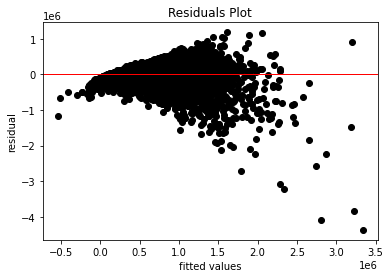

In [165]:
# Residual plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.title('Residuals Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: the residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns.

To affirm this a heteroskedacity test shall be performed

In [166]:
# heteroskedacity test
test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# Computing a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Creating and testing hypothesis
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Hence it can be affirmed that the variances are by chance not by any underlying issues or bias

## Challenging the solution

The linear regression model(model 1 employing standardization) shall be challenged with other regression techniques that are robust with outliers and multicolliniearity and the scores(Mean Squared error and Variance scores) compared.

Models to challenge Linear regression base model:
- Quantile regression
- Ridge Regression
- Lasso regresion
- Elastic net regression

### Quantile regression

The solution obtained in the baseline model where multiple linear regression was applied will be challenged using quantile regression model. The data had outliers across many of the independent variables.

Those outliers were not data misrepresentations but actual data values. Linear regression is not robust for outliers. 

Quantile regression shall be applied to obeserve whether the R2-squared test increases

Quantile regression shall be performed at three quantile levels 0.1, 0.5 and 0.9

In [167]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])
# Target variable
y = housing_prices['price']

In [168]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

In [169]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [170]:
# importing statsmodels formula api
import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
mod = smf.quantreg('y.price~ X.bedrooms + X.bathrooms + X.sqft_living + X.sqft_lot + X.floors + X.waterfront + X.view + X.condition + X.grade + X.sqft_basement + X.yr_built + X.yr_renovated + X.zipcode + X.lat + X.long + X.sqft_living15 + X.sqft_lot15 + X.renovated', data= housing_prices)
res = mod.fit(q= .25 )
res1 = mod.fit(q=.50)
res2 = mod.fit(q=.75)

# Model summary
print(res.summary())
print(res1.summary())
print(res2.summary())

### Ridge regression

The features in the dataset had a problem of multicolinearity. Linear regression does not do well with multicorrelated features and that was noted in the summary report of the various linear regression models


Ridge regression is a technique that is specialized to analyze multiple regression data which is multicollinearity in nature. A ridge regression model will be applied to this dataset to observe whether a Higher R2_score will be observed.



In [171]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])
# Target variable
y = housing_prices['price']

In [172]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

In [173]:
# Ridge model
ridge = Ridge(normalize=False)

# Determining value of hyperparameters to use
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [174]:
# Using .fit to run the model
search.fit(X,y)

# Best params to determine model strength
search.best_params_


{'alpha': 0.1}

In [175]:
# .best_scores_ function to determine the models strength
{'alpha': 0.1}
abs(search.best_score_) 

40915275160.49431

Apha value obtained was 0.01. The MSE of the model obtained with cross validation is much worse than that of the base model (model1) 

In [176]:
# fitting model with the ridge information and finding the mean squared error
ridge = Ridge(normalize=False,alpha=0.1)
ridge.fit(X,y)

Ridge(alpha=0.1, normalize=False)

In [177]:
# Mean squared error and variance scores for model1
model3_mse = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
model3_varscore = ridge.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error model3: {0:.2f}"
      .format(model3_mse))
print('Variance score model3: {0:.2f}'.format(model3_varscore))

Mean squared error model3: 40394121535.91
Variance score model3: 0.70


In [178]:
# Printing feature variable coeficients of gridlasso net regression
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 30926.823738084673,
 'bedrooms': -33419.44876441418,
 'condition': 17864.25946896851,
 'floors': 4014.796133754168,
 'grade': 111949.56494910755,
 'latitude': 83653.07152171741,
 'longitude': -30289.65930474852,
 'renovated': -1223914.4271729593,
 'square feet above': 76735.78332205662,
 'square feet basement': 26700.949902917422,
 'square feet living room': 82052.22554084295,
 'square feet living15': 15340.581022029943,
 'square feet lot': 5468.936434163026,
 'square feet lot15': -10511.837082838527,
 'view': 40830.64596944051,
 'waterfront': 50861.35404331346,
 'year built': -76976.62925504043,
 'year renovated': 1232034.1587279895,
 'zipcode': -31289.407829057243}

Without cross validation the result improves from 40915275160.49431 to 40394121535.905266. This result is comparable to that obatined from the base model (model 1 MSE = 40392039555.60). 

This result indicates that there is little difference between the ridge and the base model in predicting price of a house.

The coefficients in the ridge regression model suffered only slight alterations compared to the base linear model

### Lasso regression

To further challenge the base model solution, LASSO regression shall be applied. LASSO not only performs regulization but can also perform feature selection.

The least important features shall have their coefficients being reduced to zero or closer to zero

The changes in r2 score will be observed

In [179]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])

# Target variable
y = housing_prices['price']

In [180]:
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

lasso = linear_model.Lasso(normalize = True) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X, y) 

# Printinig out the optimum penalization coefficient
print("lasso best parameters:", gridlasso.best_params_)


lasso best parameters: {'alpha': 0.1}


In [181]:
# Mean squared error and variance scores for model1
model4_mse = (mean_squared_error(y, gridlasso.predict(X)))

# Printing lasso regression model R-squared scores
model4_varscore = gridlasso.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error model4: {0:.2f}"
      .format(model4_mse))

print('Variance score model4: {0:.2f}'.format(model4_varscore))

Mean squared error model4: 40504942286.02
Variance score model4: 0.70


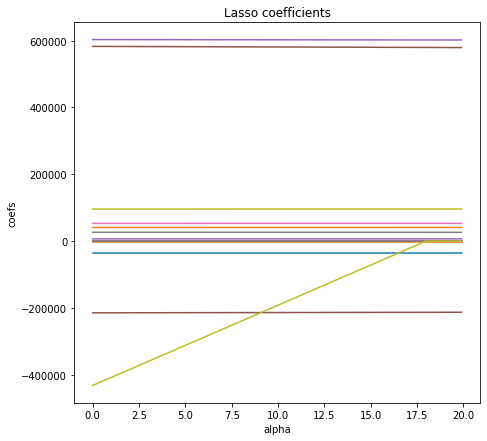

In [182]:
# Empty list for lasso regression variable coefficients
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X, y)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
plt.figure(figsize = (16,7))

# Ploting alpha penalization values versus variable coefficeints obtained from lasso regresssion
plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

In [183]:
# Printing feature variable coeficients of gridlasso net regression
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40939.161274045415,
 'bedrooms': -35718.40058362486,
 'condition': 26424.726836351903,
 'floors': 6833.939706051251,
 'grade': 96039.92365039772,
 'latitude': 601726.8032190731,
 'longitude': -212756.03455718112,
 'renovated': -0.0,
 'square feet above': -103.74600269069704,
 'square feet basement': -134.78260188997746,
 'square feet living room': 285.05781046698615,
 'square feet living15': 21.651810312264693,
 'square feet lot': 0.12711337839588688,
 'square feet lot15': -0.3832006435281865,
 'view': 53245.98690229525,
 'waterfront': 579159.6761471158,
 'year built': -2624.5305106557275,
 'year renovated': 20.2683776127105,
 'zipcode': -580.0332301076337}

- Best value for hyperparameter alpha obtained was 0.1

- From the plot lasso shrinks coeffecients of the feature variables closer to zero

- Lasso regression had the highest effect on the smallest coeficients and shrunk 'square feet lot15' and 'square feet lot' attribute to a figure closer to zero implying these attributes contributed less to house price prediction.

- The attribute renovated was completely reduced to zero. 'square feet above',
 'square feet basement', 'square feet living room', square feet living15' and 'year renovated' coefficients were reduced significantly 

- Compared to the first model lasso regression fairs slighly worse than the linear regression base model in terms of it MSE. The variance scores are however similar. The variance scores and MSE values are listed below:

  - - Mean squared error linear reg base model: 40392039555.60
  - - Variance score linear reg base model: 0.70
  - - Mean squared error lasso reg model: 40504942286.02
  - - Variance score lasso reg model: 0.70




 


### Elastic net regression

The base model shall be challenged further with Elastic Net Regression. This type of regression combines the power of ridge and lasso regression into one algorithm. What this means is that with elastic net the algorithm can remove weak variables altogether as with lasso or to reduce them to close to zero as with ridge. 

Reasons are:
- It encourages group effect in case of highly correlated variables. 
- There are no limitations on the number of selected variables; a limitation of the Lasso regression method.
- On top of the least-squares method, it introduces a penalty on regression coefficients which is a convex combination of lasso and ridge penalty.


In [184]:
# Independent variables
X = housing_prices.drop(columns = ['id','price'])

# Target variable
y = housing_prices['price']

In [185]:
# Elastic Net Model setting data to be normalized
elastic=ElasticNet(normalize=True)

# Creating grid
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [186]:
# Fitting model
search.fit(X,y)

GridSearchCV(cv=10, estimator=ElasticNet(normalize=True), n_jobs=1,
             param_grid={'alpha': array([0.000010, 0.000100, 0.001000, 0.010000, 0.100000, 1.000000,
       10.000000, 100.000000]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             scoring='neg_mean_squared_error')

In [187]:
# displaying best parameters
params_dict = search.best_params_
print(params_dict)

print('''                       ''')

# Getting alpha key
alpha = params_dict.get("alpha")
output = f"{alpha:.7f}"

# Printing alpha value
print(f'alpha value: {output}')


# Best result we can get with the model
print(f'best score: {abs(search.best_score_)}')

print('''                          ''')

print('The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8')

{'alpha': 1e-05, 'l1_ratio': 0.8}
                       
alpha value: 0.0000100
best score: 41055277341.42381
                          
The best hyperparameters was an alpha set to 0.00001 and a l1_ratio of 0.8


In [188]:
# Specifying hyperparametes
elastic=ElasticNet(normalize=True, alpha=0.00001, l1_ratio=0.8)

# Fitting our model
elastic.fit(X,y)


ElasticNet(alpha=1e-05, l1_ratio=0.8, normalize=True)

In [189]:
# Printing feature variable coeficients of elastic net regression
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline


{'bathrooms': 39969.87132913171,
 'bedrooms': -30793.001424254686,
 'condition': 27830.899090881812,
 'floors': 9140.59361995741,
 'grade': 89134.51474039747,
 'latitude': 583526.6037822178,
 'longitude': -206451.8415919071,
 'renovated': 19678.81253149492,
 'square feet above': 87.48652745805992,
 'square feet basement': 61.31471687822271,
 'square feet living room': 85.3552089181024,
 'square feet living15': 32.139167952341374,
 'square feet lot': 0.1220785266725985,
 'square feet lot15': -0.33789062979943496,
 'view': 53212.74215277033,
 'waterfront': 564234.4645100425,
 'year built': -2367.9716106723745,
 'year renovated': 14.927995373613562,
 'zipcode': -497.2617548911987}

The coefficients of 'square feet lot' and 'square feet lot15' were reduced closer to zero. 'square feet above', 'square feet basement', 'square feet living room', square feet living15' and 'year renovated' coeffiecnts were reduced greately relative to the linear base model

In [190]:
# Mean squared error and variance scores for model1
model5_mse = (mean_squared_error(y, elastic.predict(X)))

# Printing lasso regression model R-squared scores
model5_varscore = elastic.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error model5: {0:.2f}"
      .format(model5_mse))

print('Variance score model5: {0:.2f}'.format(model5_varscore))

Mean squared error model5: 40616622285.67
Variance score model5: 0.70


The elastic net regression model had a slightly worser RMSE of 40616622285.67 compared to the base linear regression model that had an RMSE of 40392039555.60.

The two models however had similar variance scores of 0.7

## Summary

The base models and the various regression models shall be summarized here

In [192]:
# Independent variables
X = housing_prices.drop(columns = ['id', 'price'])
# Target variable
y = housing_prices['price']

In [193]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X_scaled = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

In [194]:
# Base linear regression model for predicting house prices
house_prices_linearegression = linear_model.LinearRegression()

# Ridge regression model for predicting house prices
house_prices_ridge = Ridge(normalize=False,alpha=0.1)

# Lasso regression model for predicting house prices
house_prices_lasso = linear_model.Lasso(normalize = True, alpha=0.1) 

# Elastic Net regression model for predicting house prices
house_prices_ElasticNet = ElasticNet(normalize=True, alpha=0.00001, l1_ratio=0.8)

# List of models
models_standardized = [(house_prices_linearegression, 'Linear Regression'),
           (house_prices_ridge, "Ridge Regression")
           ]
models_normalized = [(house_prices_lasso, 'Lasso'), (house_prices_ElasticNet, "Elastic Net")]

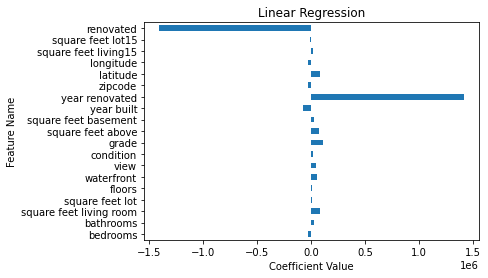

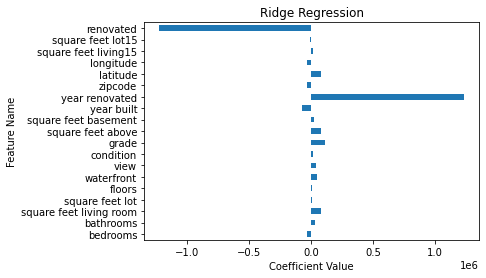

In [195]:
for model in models_standardized:
    model[0].fit(X_scaled, y)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

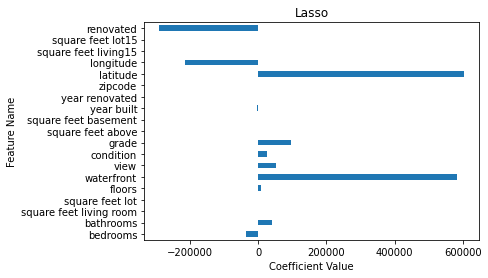

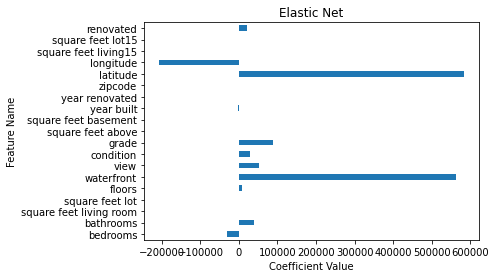

In [196]:
for model in models_normalized:
    model[0].fit(X, y)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

From the visualizations above, lasso and elasticnet regression reduced the less important features to zero or really close to zero justifying their usefullness in feature selection. 

Features reduced to zero or close to zero lasso regression:
 
 - 'square feet living15', 'square feet lot15', 'year renovated', 'zipcode', 'square feet living room', 'square feet lot', 'floors'

 Features reduced to zero or close to zero Elastic net regression:
 
 - 'square feet living15', 'square feet lot15', 'year renovated', 'zipcode', 'square feet living room', 'square feet lot', 'floors'

 Both models reduced similar features

In [197]:
# Mean square error and variance scores for model1
model1_mse = (mean_squared_error(y_true=y,y_pred=house_prices_linearegression.predict(X_scaled)))
model1_varscore = house_prices_linearegression.score(X_scaled, y)

# Printing the mean square error and variance scores
print("Mean squared error linear regression base model: {0:.2f}".format(model1_mse))
print('Variance score linear regression base model: {0:.2f}'.format(model1_varscore))

# Mean squared error and variance scores for model1
model3_mse = (mean_squared_error(y_true=y,y_pred=house_prices_ridge .predict(X_scaled)))
model3_varscore = house_prices_ridge.score(X_scaled, y)

# Printing Mean squared error and variance scores
print("Mean squared error ridge regression: {0:.2f}".format(model3_mse))
print('Variance score ridge regression: {0:.2f}'.format(model3_varscore))

Mean squared error linear regression base model: 40392039555.60
Variance score linear regression base model: 0.70
Mean squared error ridge regression: 40394121535.91
Variance score ridge regression: 0.70


In [198]:
# Mean squared error and variance scores for model1
model4_mse = (mean_squared_error(y, house_prices_lasso.predict(X)))

# Printing lasso regression model R-squared scores
model4_varscore = house_prices_lasso.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error lasso regression: {0:.2f}".format(model4_mse))

print('Variance score lasso regression: {0:.2f}'.format(model4_varscore))

# Mean squared error and variance scores for model1
model5_mse = (mean_squared_error(y, house_prices_ElasticNet.predict(X)))

# Printing lasso regression model R-squared scores
model5_varscore = house_prices_ElasticNet.score(X, y)

# Printing Mean squared error and variance scores
print("Mean squared error elastic net regression: {0:.2f}".format(model5_mse))

print('Variance score elastic net regression: {0:.2f}'.format(model5_varscore))

Mean squared error lasso regression: 40504942286.02
Variance score lasso regression: 0.70
Mean squared error elastic net regression: 40616622285.67
Variance score elastic net regression: 0.70


## Conclusions

1. From the plots of the four models, ridge and linear regression models do noa significantly affect the values of the coefficeints.

2. On the other hand, Lasso and elastic net regression techniques reduce the less important features to zero/close to zero hence can serve as tools for feature selection

3. All models had a similar r2_score/variance score of 0.7 implying 70.1% of the data fit into the model. The MSE of the different models varied slightly for the different models hence it can be concluded that all models have similar performance on this dataset.

4. The model with the lowest Mean squared error and showed the most promise in predicting house prices was the Multiple linear regression base model with a mean squared error of 40392039555.60

5. Elastic net model of the 4 models was the poorest perfomer with the highest Mean squared error of 40616622285.67

6. However the differences are sloght hence it can be concluded there is no major difference between the different models. The slight difference in MSE scores can be overlooked due to the added advantage of LASSO and elasticnet where they can also function in feature selection.

7. Due to the slightly higher accuracy of the of the simple base linear regression model, it's simplicity and it's computational inexpensiveness the linear regression model shall be employed in predicting house prices. 

8. However an argument can be made for Lasso and Elastic net models. For their slightly poor MSE values, they make up for it by performing feature selection which helps reduce noise within the model

## Further questions

1. Did we have the right data?

- The data provided is accurate and most of the attributes are useful in predicting house price  

2. Do we need other data to answer our question?

- No. The data is not sufficient to meet our set succes metric. With further tuning of the model to remove noise in the data, higher r2_score can be obtained but will most likely still fall short of the set metric

- Housing prices are affected by a myriad of other factors such as the economic situation in a country, goverment policies which might affect access to housing finance loans among other factors

- More data needs to be collected on these factors in order to meet the set succes metric

c). Did we have the right question?
- The aims of the study from the question set were achievable with the resources at hand